In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\marti\AppData\Local\Temp\ipykernel_17316\3089653066.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df1 = pd.read_csv('datasets\Q_06_latest-2023-2024_RR-T-Vent.csv', sep= ';')
df2 = pd.read_csv('datasets\Q_06_previous-1950-2022_RR-T-Vent.csv', sep = ';')

In [3]:
df1.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,DXI2,QDXI2,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S
0,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230101,0.0,1.0,11.9,1.0,...,NaN,NaN,NaN,NaN,5.7,1.0,NaN,NaN,2042.0,9.0
1,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230102,0.0,1.0,10.3,1.0,...,NaN,NaN,NaN,NaN,10.4,1.0,NaN,NaN,1927.0,9.0
2,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230103,0.0,1.0,10.7,1.0,...,NaN,NaN,NaN,NaN,4.1,1.0,NaN,NaN,139.0,9.0
3,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230104,0.0,1.0,10.2,1.0,...,NaN,NaN,NaN,NaN,7.3,1.0,NaN,NaN,1632.0,9.0
4,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230105,0.0,1.0,9.1,1.0,...,NaN,NaN,NaN,NaN,7.7,1.0,NaN,NaN,1922.0,9.0


In [4]:
df1.columns

Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ', 'RR', 'QRR',
       'TN', 'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S'],
      dtype='object')

In [5]:
df1 = df1.drop(['QTN','QRR', 'HTN', 'QHTN', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S'], axis=1)
df2 = df2.drop(['QTN','QRR', 'HTN', 'QHTN', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S'], axis=1)

In [6]:
df1.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,TN,TX
0,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230101,0.0,11.9,15.7
1,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230102,0.0,10.3,16.7
2,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230103,0.0,10.7,18.2
3,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230104,0.0,10.2,18.2
4,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230105,0.0,9.1,16.9


In [7]:
df2.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,TN,TX
0,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520101,0.0,NaN,NaN
1,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520102,0.0,NaN,NaN
2,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520103,0.0,NaN,NaN
3,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520104,0.0,NaN,NaN
4,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520105,0.0,NaN,NaN


In [8]:
df = pd.concat([df2, df1])

In [9]:
df.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,TN,TX
0,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520101,0.0,NaN,NaN
1,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520102,0.0,NaN,NaN
2,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520103,0.0,NaN,NaN
3,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520104,0.0,NaN,NaN
4,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520105,0.0,NaN,NaN


In [10]:
df_test = df[df['NOM_USUEL'] == 'TENDE_SAPC']

In [11]:
df_test.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,TN,TX
1627019,6163007,TENDE_SAPC,44.043167,7.586,636,19890721,0.0,12.7,27.0
1627020,6163007,TENDE_SAPC,44.043167,7.586,636,19890722,0.0,18.2,27.0
1627021,6163007,TENDE_SAPC,44.043167,7.586,636,19890723,0.0,18.7,27.8
1627022,6163007,TENDE_SAPC,44.043167,7.586,636,19890724,1.2,17.9,27.2
1627023,6163007,TENDE_SAPC,44.043167,7.586,636,19890725,3.2,16.1,29.3


In [12]:
df_test.dropna(subset = ['TN', 'TX', 'RR'], inplace = True)
df_test.shape

C:\Users\marti\AppData\Local\Temp\ipykernel_17316\2537731509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(subset = ['TN', 'TX', 'RR'], inplace = True)


(12313, 9)

## Séries temporelles

In [13]:
from pmdarima import auto_arima

model = auto_arima(df_test['TX'], seasonal=True, trace=True, stepwise= True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=57602.956, Time=8.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=84073.732, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=58799.438, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=73436.863, Time=1.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=107871.623, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=57845.339, Time=2.84 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=57608.648, Time=3.57 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=57612.541, Time=4.38 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=57604.465, Time=7.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=58112.373, Time=1.78 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=57701.896, Time=3.34 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=57602.777, Time=11.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=58102.075, Time=1.33 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=57604.554, Time=10.39 sec
 ARIMA(2,0,0)(0,

Meilleur modèle : ARIMA(3,0,1)

C:\Users\marti\AppData\Local\Temp\ipykernel_17316\3539273203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['date'] = pd.to_datetime(df_test['AAAAMMJJ'], format='%Y%m%d')


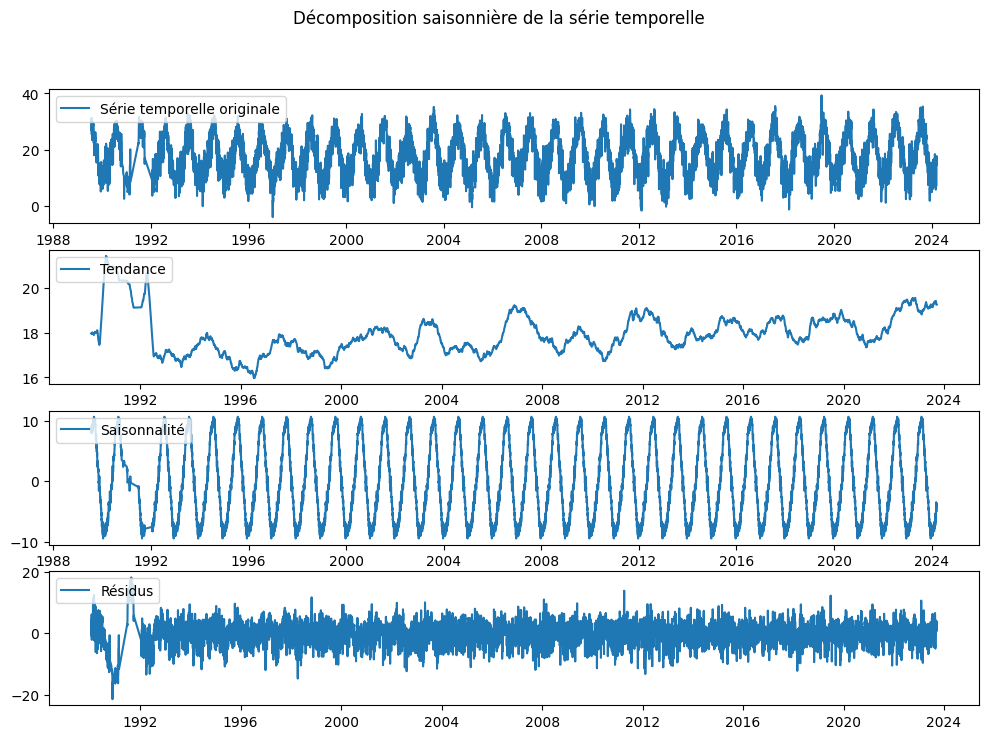

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Supposons que votre DataFrame contient une série temporelle dans une colonne nommée 'valeur' et une colonne 'AAAAMMJJ' pour les dates

# Convertir la colonne 'AAAAMMJJ' en format de date
df_test['date'] = pd.to_datetime(df_test['AAAAMMJJ'], format='%Y%m%d')

# Définir la colonne 'date' comme index
df_test.set_index('date', inplace=True)
df_test.drop('AAAAMMJJ', axis = 1)

# Effectuer la décomposition saisonnière
decomposition = seasonal_decompose(df_test['TX'], model='additive', period= 365)

# Visualiser les composantes de la décomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

# Afficher les composantes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_test.index, df_test['TX'], label='Série temporelle originale')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(df_test.index, trend, label='Tendance')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(df_test.index, seasonal,label='Saisonnalité')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(df_test.index, residuals, label='Résidus')
plt.legend(loc='upper left')

plt.suptitle('Décomposition saisonnière de la série temporelle')
plt.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_test['TX'], order=(3, 0, 1))
model = model.fit()

c:\3A\envmap588\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\3A\envmap588\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\3A\envmap588\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


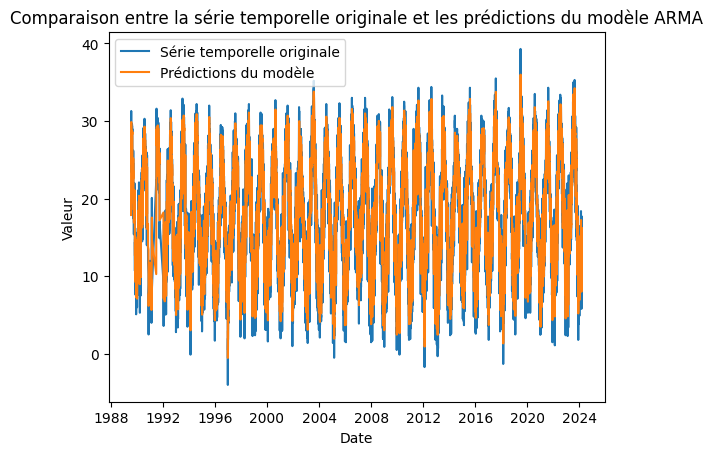

In [16]:
# Visualiser la série temporelle originale
plt.plot(df_test.index, df_test['TX'], label='Série temporelle originale')


start_date = '1950-01-01'
end_date = '2024-03-17'
# Obtenir les prédictions du modèle
predictions = model.predict()

# Visualiser les prédictions
plt.plot(df_test.index, predictions, label='Prédictions du modèle')

plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Comparaison entre la série temporelle originale et les prédictions du modèle ARMA')
plt.legend()
plt.show()

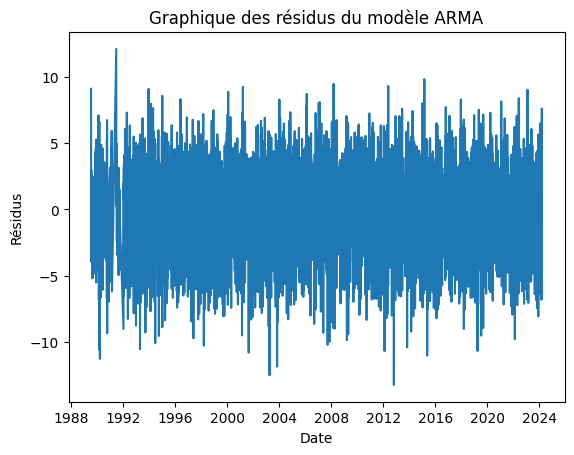

In [17]:
# Obtenir les résidus du modèle
residuals = model.resid

# Visualiser les résidus
plt.plot(df_test.index, residuals)
plt.xlabel('Date')
plt.ylabel('Résidus')
plt.title('Graphique des résidus du modèle ARMA')
plt.show()

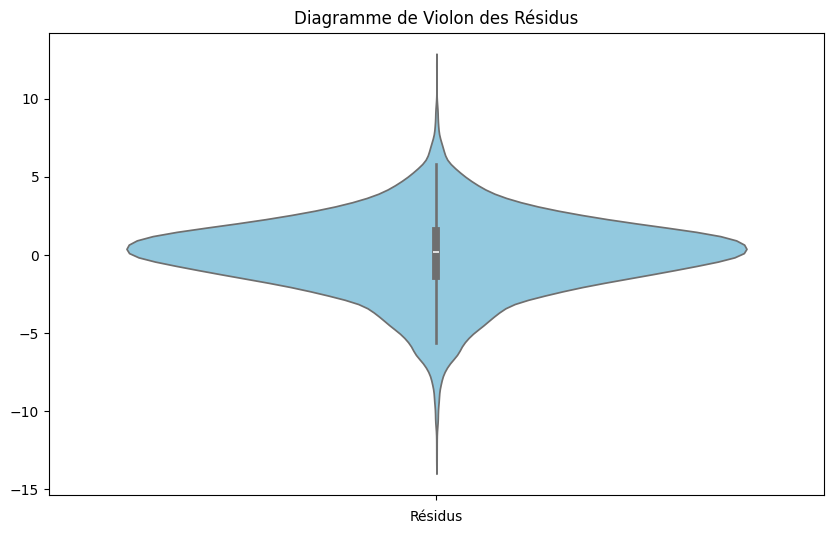

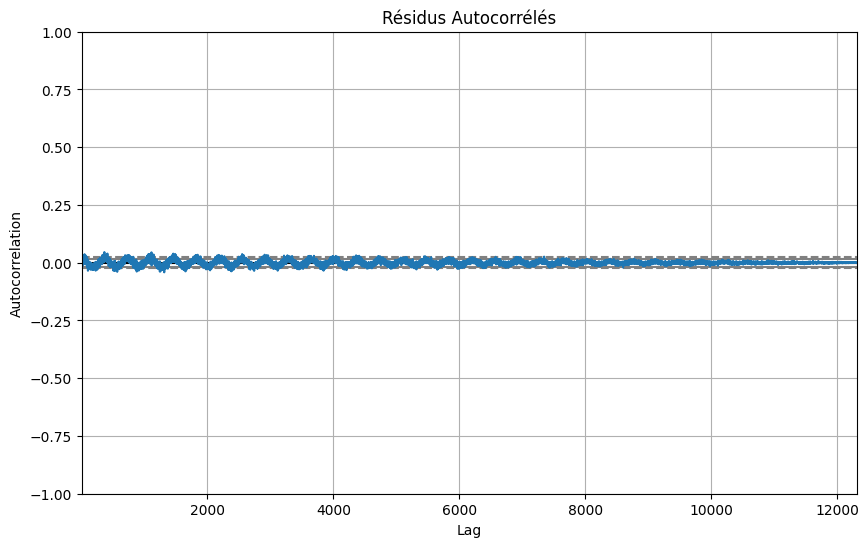

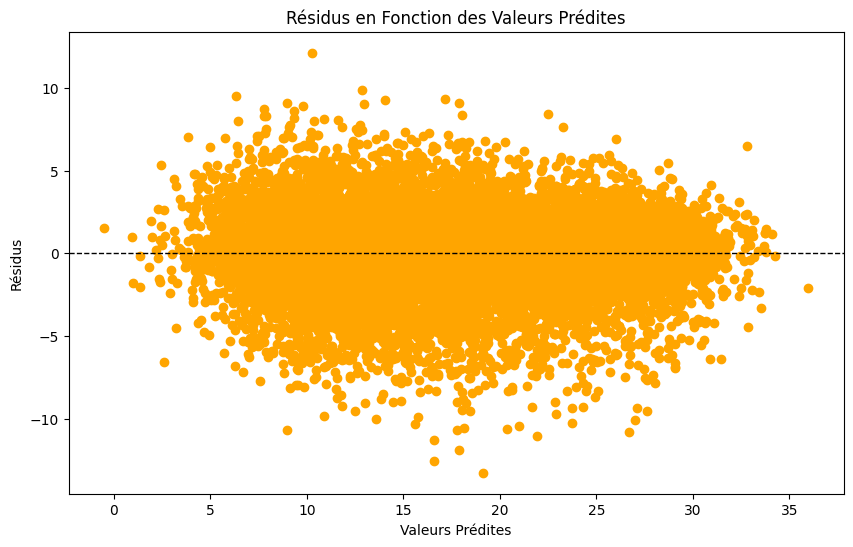

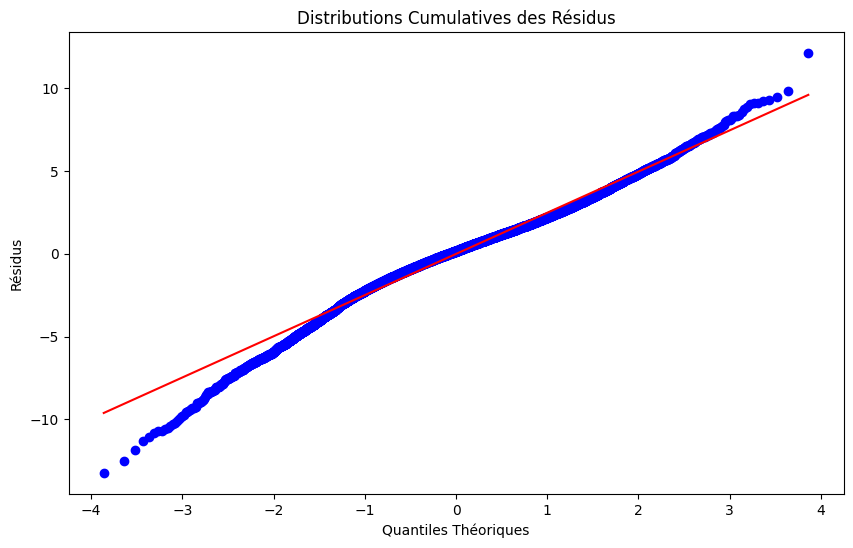

In [54]:
import seaborn as sns

# Diagramme de Violon des Résidus
plt.figure(figsize=(10, 6))
sns.violinplot(data=residuals, color='skyblue')
plt.title('Diagramme de Violon des Résidus')
plt.xlabel('Résidus')
plt.show()

# Tracé des Résidus Autocorrélés
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(residuals)
plt.title('Résidus Autocorrélés')
plt.show()

# Tracé des Résidus en Fonction des Valeurs Prédites
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='orange')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Résidus en Fonction des Valeurs Prédites')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.show()

# Tracé des Distributions Cumulatives des Résidus
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Distributions Cumulatives des Résidus')
plt.xlabel('Quantiles Théoriques')
plt.ylabel('Résidus')
plt.show()

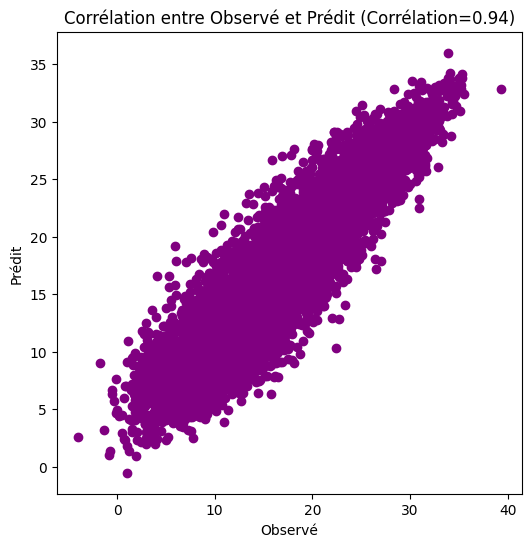

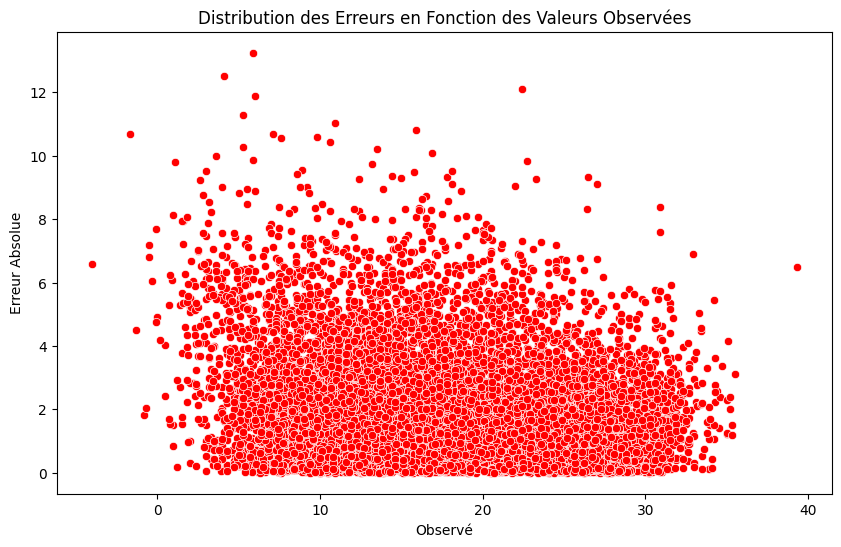

In [66]:
# Tracé de la corrélation entre les valeurs observées et prédites
correlation = np.corrcoef(df_test['TX'], predictions)[0, 1]
plt.figure(figsize=(6, 6))
plt.scatter(df_test['TX'], predictions, color='purple')
plt.title(f'Corrélation entre Observé et Prédit (Corrélation={correlation:.2f})')
plt.xlabel('Observé')
plt.ylabel('Prédit')
plt.show()


# Tracé de la distribution des erreurs en fonction des valeurs observées
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_test['TX'], y=absolute_errors, color='red')
plt.title('Distribution des Erreurs en Fonction des Valeurs Observées')
plt.xlabel('Observé')
plt.ylabel('Erreur Absolue')
plt.show()

## Valeurs extrêmes

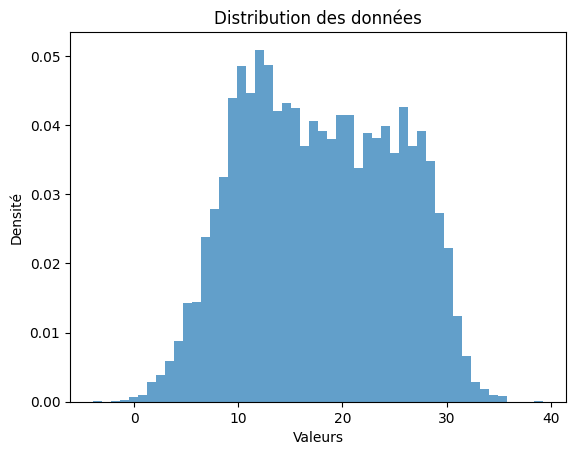

Seuil pour les valeurs extrêmes: 29.4


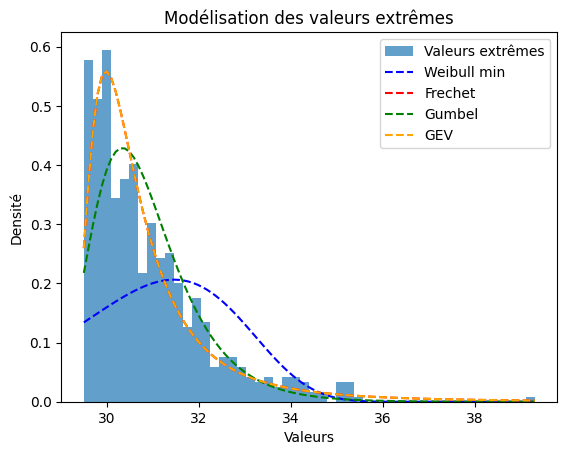

In [41]:
from scipy.stats import invweibull, gumbel_r, genextreme, weibull_min

# Visualiser la distribution des données
plt.hist(df_test['TX'], bins=50, density=True, alpha=0.7)
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.title('Distribution des données')
plt.show()

# Détermination du seuil pour les valeurs extrêmes
threshold = df_test['TX'].quantile(0.95)
print("Seuil pour les valeurs extrêmes:", threshold)

# Sélection des valeurs extrêmes
extreme_values = df_test[df_test['TX'] > threshold]['TX']

# Ajustement de la distribution de Weibull min aux valeurs extrêmes
shape, loc, scale = weibull_min.fit(extreme_values, floc=0)
x_weibull = np.linspace(min(extreme_values), max(extreme_values), 100)
pdf_fitted_weibull = weibull_min.pdf(x_weibull, shape, loc, scale)

# Ajustement de la distribution de Gumbel aux valeurs extrêmes
params_gumbel = gumbel_r.fit(extreme_values)
x_gumbel = np.linspace(min(extreme_values), max(extreme_values), 100)
pdf_fitted_gumbel = gumbel_r.pdf(x_gumbel, *params_gumbel)

# Ajustement de la distribution de Fréchet aux valeurs extrêmes
params_frechet = invweibull.fit(extreme_values)
x_frechet = np.linspace(min(extreme_values), max(extreme_values), 100)
pdf_fitted_frechet = invweibull.pdf(x_frechet, *params_frechet)

# Ajustement de la distribution de GEV aux valeurs extrêmes
params_gev = genextreme.fit(extreme_values)
x_gev = np.linspace(min(extreme_values), max(extreme_values), 100)
pdf_fitted_gev = genextreme.pdf(x_gev, *params_gev)

# Visualisation des distributions ajustées
plt.hist(extreme_values, bins=50, density=True, alpha=0.7, label='Valeurs extrêmes')
plt.plot(x_weibull, pdf_fitted_weibull, color='blue', linestyle='--', label='Weibull min')
plt.plot(x_frechet, pdf_fitted_frechet, color='red', linestyle='--', label='Frechet')
plt.plot(x_gumbel, pdf_fitted_gumbel, color='green', linestyle='--', label='Gumbel')
plt.plot(x_gev, pdf_fitted_gev, color='orange', linestyle='--', label='GEV')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.title('Modélisation des valeurs extrêmes')
plt.legend()
plt.show()

Note : Les distributions GEV et Fréchet sont quasiment identique

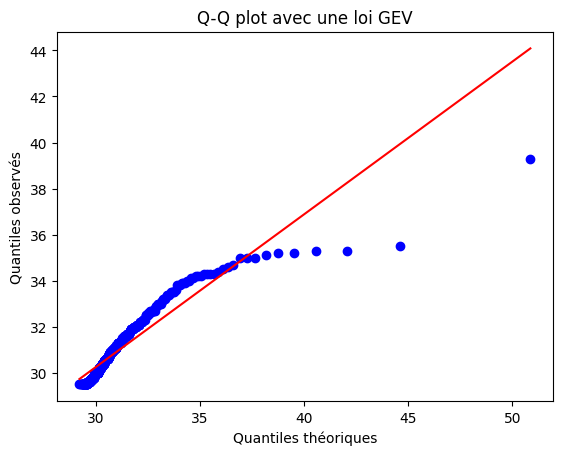

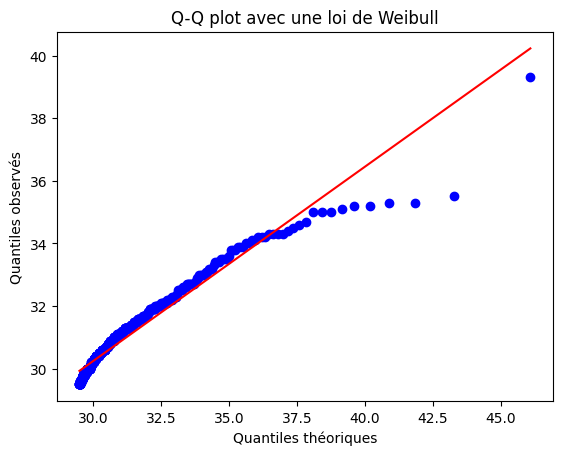

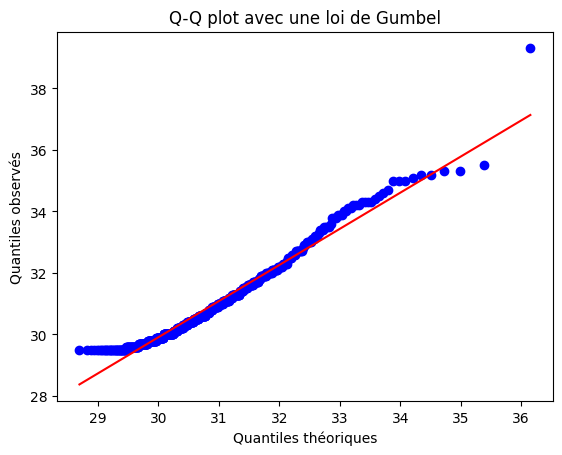

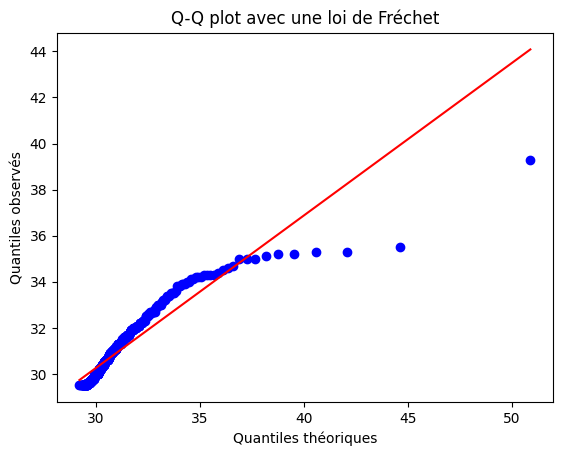

In [45]:
import scipy.stats as stats

data = extreme_values
# Ajustement de la loi GEV
gev_params = stats.genextreme.fit(data)

# Ajustement de la loi de Fréchet
frechet_params = stats.invweibull.fit(data)

# Ajustement de la loi de Weibull
weibull_params = stats.weibull_min.fit(data)

# Ajustement de la loi de Gumbel
gumbel_params = stats.gumbel_r.fit(data)


# Q-Q plot pour GEV
stats.probplot(data, dist="genextreme", sparams=gev_params, plot=plt)
plt.title("Q-Q plot avec une loi GEV")
plt.xlabel("Quantiles théoriques")
plt.ylabel("Quantiles observés")
plt.show()

# Q-Q plot pour Weibull
stats.probplot(data, dist="weibull_min", sparams=weibull_params, plot=plt)
plt.title("Q-Q plot avec une loi de Weibull")
plt.xlabel("Quantiles théoriques")
plt.ylabel("Quantiles observés")
plt.show()

# Q-Q plot pour Gumbel
stats.probplot(data, dist="gumbel_r", sparams=gumbel_params, plot=plt)
plt.title("Q-Q plot avec une loi de Gumbel")
plt.xlabel("Quantiles théoriques")
plt.ylabel("Quantiles observés")
plt.show()

# Q-Q plot pour GEV
stats.probplot(data, dist="invweibull", sparams=frechet_params, plot=plt)
plt.title("Q-Q plot avec une loi de Fréchet")
plt.xlabel("Quantiles théoriques")
plt.ylabel("Quantiles observés")
plt.show()

#### Estimation des paramètres pour les différentes lois

Pour rappel, pour la loi de Weibull :

$$ f(x) = \frac{c}{\lambda} \left(\frac{x}{\lambda}\right)^{c-1} \exp \left[-\left(\frac{x}{\lambda}\right)^c\right]$$ 

In [42]:
# Estimation des paramètres de la loi de Weibull
shape, loc, scale = stats.weibull_min.fit(data)

# Affichage des paramètres estimés
print("Paramètre de forme (c) :", shape)
print("Paramètre d'échelle (lambda) :", scale)

Paramètre de forme (c) : 0.7504764235333583
Paramètre d'échelle (lambda) : 1.2947634244604227


Pour une loi de Gumbel :

$$ f(x) = \frac{1}{\beta} \exp \left[- \frac{x- \mu}{\beta} - \exp\left(- \frac{x- \mu}{\beta}\right) \right]$$ 

In [46]:
# Estimation des paramètres de la loi de Gumbel
loc, scale = stats.gumbel_r.fit(data)

# Affichage des paramètres estimés
print("Paramètre de localisation (mu) :", loc)
print("Paramètre d'échelle (beta) :", scale)

Paramètre de localisation (mu) : 30.33740809846613
Paramètre d'échelle (beta) : 0.8578617426851506


Pour une loi de Fréchet :
$$ f(x) = \frac{\alpha}{\beta} \left(\frac{x - \gamma}{\beta}\right)^{-1 - \alpha} \exp\left[-\left(\frac{x - \gamma}{\beta}\right)^{-\alpha}\right] $$

In [47]:
# Estimation des paramètres de la loi de Fréchet
alpha, loc, scale = stats.invweibull.fit(data)

# Affichage des paramètres estimés
print("Paramètre de forme (alpha) :", alpha)
print("Paramètre de localisation (gamma) :", loc)
print("Paramètre d'échelle (beta) :", scale)

Paramètre de forme (alpha) : 2.749915855352925
Paramètre de localisation (gamma) : 28.262789393342054
Paramètre d'échelle (beta) : 1.9222144946326314


Pour une loi GEV :

$$  f(x) = \frac{1}{\sigma} \left[1 + \xi\left(\frac{x - \mu}{\sigma}\right)\right]^{-\frac{1}{\xi} - 1} \exp\left[-\left[1 + \xi\left(\frac{x - \mu}{\sigma}\right)\right]^{-\frac{1}{\xi}}\right] $$

In [49]:
# Estimation des paramètres de la loi GEV
xi, loc, scale = stats.genextreme.fit(data)

# Affichage des paramètres estimés
print("Paramètre de forme (xi) :", xi)
print("Paramètre de localisation (mu) :", loc)
print("Paramètre d'échelle (sigma) :", scale)

Paramètre de forme (xi) : -0.36363139639183806
Paramètre de localisation (mu) : 30.184998665701237
Paramètre d'échelle (sigma) : 0.6989944923034954
